# Part 2 Answers:

### Answer 1: Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [2]:
# Import the required libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import itertools as itls

In [3]:
# Create a path variable
path = r'C:\\Users\\sands\\Documents\\01-2022 Instacart Basket Analysis'

In [4]:
# Import the dataset
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Instacart_data_without_unnamed_col.pkl'))

In [29]:
# Check the import is donce correctly
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 28 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   First Name              object 
 2   Last Name               object 
 3   Gender                  object 
 4   State                   object 
 5   Age                     int64  
 6   date_joined             object 
 7   number_of_dependants    int64  
 8   marital_status          object 
 9   income                  int64  
 10  order_id                int64  
 11  order_number            int64  
 12  orders_day_of_week      int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
 15  product_id              int64  
 16  add_to_cart_order       int64  
 17  reordered               int64  
 18  product_name            object 
 19  aisle_id                int64  
 20  department_id           int64  
 21  prices                  float

### Answer 3: You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column

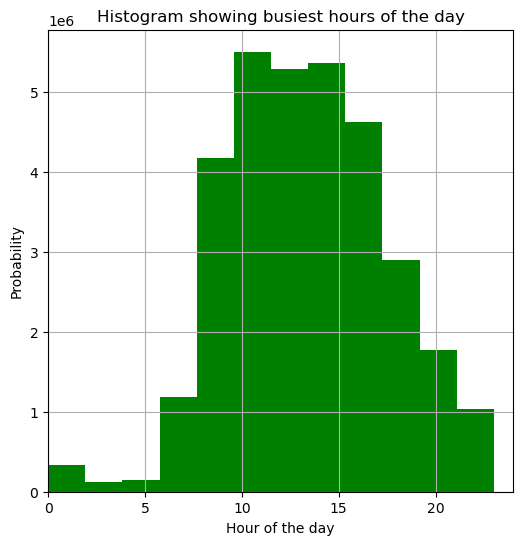

In [5]:
# Set the figure size
plt.rcParams["figure.figsize"] = [6, 6]

x = df_merged['order_hour_of_day']
num_bins = 12

# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, facecolor='g', alpha=1)

plt.xlabel('Hour of the day')
plt.ylabel('Probability')
plt.title('Histogram showing busiest hours of the day')
plt.xlim(0, 24)
plt.grid(True)

# Save the histogram
plt.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'hist_orders_hour_of_day.png'))

# Display the histogram
plt.show()

### *** It can be seen that the maximum activity happens between 9am to 12pm and least during midnight

### Answer 4:	The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

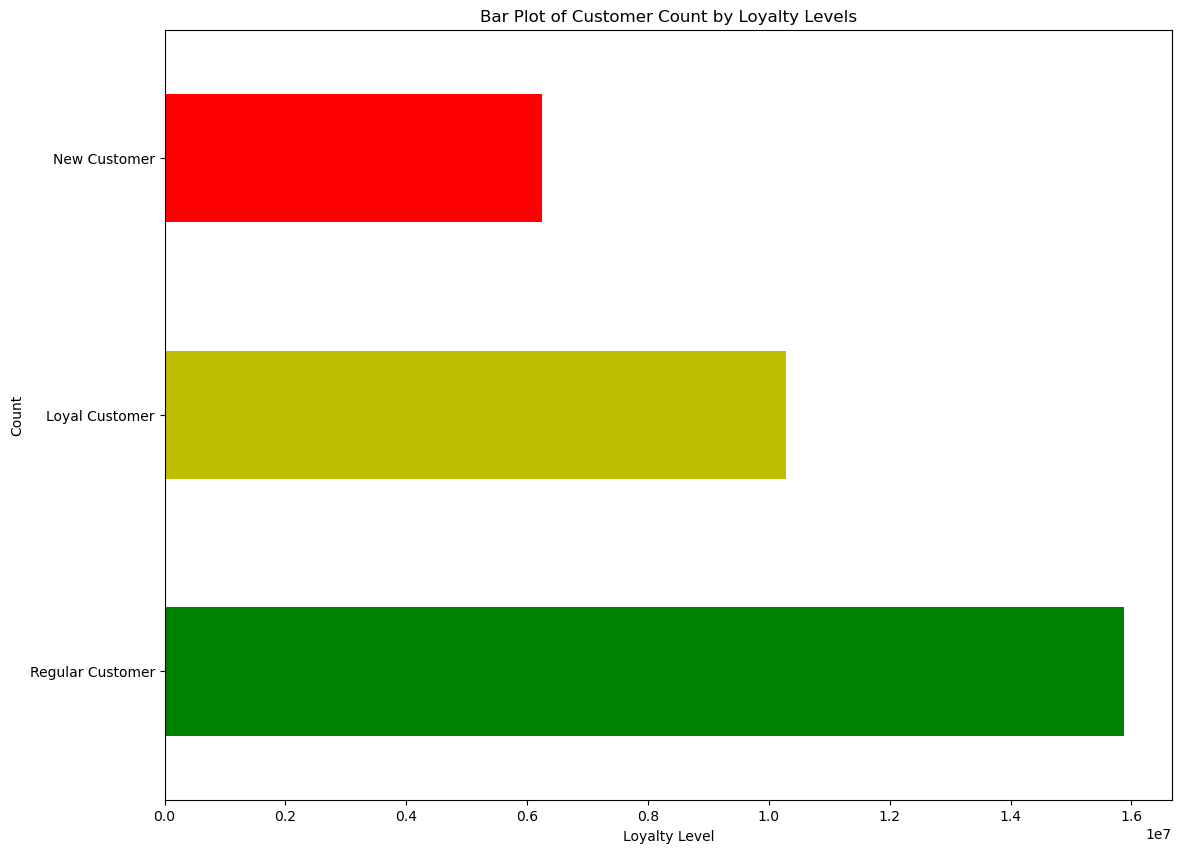

In [6]:
# Draw a plot bar chart

df_merged['loyalty_flag'].value_counts().plot(kind="barh", color=['g','y','r'],figsize=(13,10))

# Set the labels and plot title
plt.title("Bar Plot of Customer Count by Loyalty Levels")
plt.xlabel("Loyalty Level")
plt.ylabel("Count")

# Save the plot
plt.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_cust_loyalty.png'))

### ***Maximum number of customers are Regular Customers , followed by the count of loyal customers

### Answer 5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [7]:
# Create a 70/30 split data
np.random.seed(29)

In [8]:
# Assign the random values to a list dev
dev = np.random.rand(len(df_merged)) <= 0.7

In [9]:
dev

array([False,  True,  True, ...,  True, False,  True])

In [10]:
# Divide the dataset into two categories
big = df_merged[dev]
small = df_merged[~dev]

In [11]:
# check the length of the df dataframe
len(df_merged)

32404859

In [12]:
# Check the sum of the length of the two subsets
len(big) + len(small)

32404859

#### The total matches the length of the original dataframe, so we know the the division was done correctly

In [13]:
# Create a subset with only the required columns for line chart
df_2 = small[['order_hour_of_day','prices']]

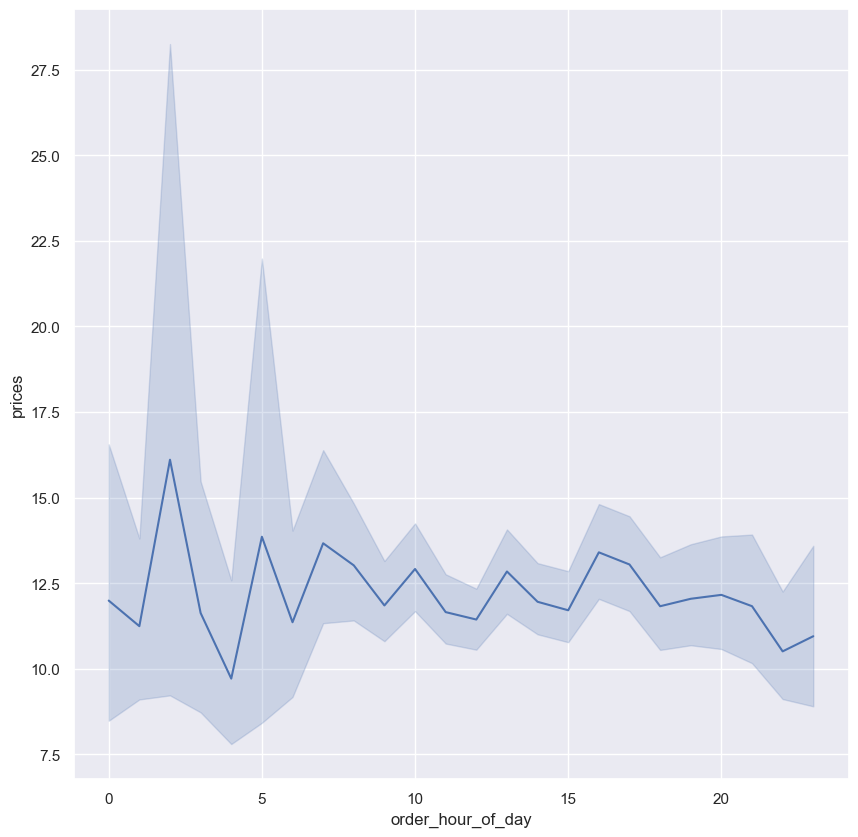

In [46]:
#define figure size
sns.set(rc={"figure.figsize":(6, 6)})

# Draw a line chart
line_chart_order_hour_of_day_prices = sns.lineplot(
    data = df_2, x = 'order_hour_of_day',y = 'prices',markers=True, palette='crest', legend='full').set(
    title='Hour of the Day vs. Prices')

# Save the plot
plt.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'line_chart_order_hour_of_day_prices.png'))

### Answer 6: Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
### o	In a markdown cell beneath your line chart, describe what the line chart shows.


In [38]:
# Create a subset with only the required columns for line chart
df_age_dependants = small[['Age','number_of_dependants']]

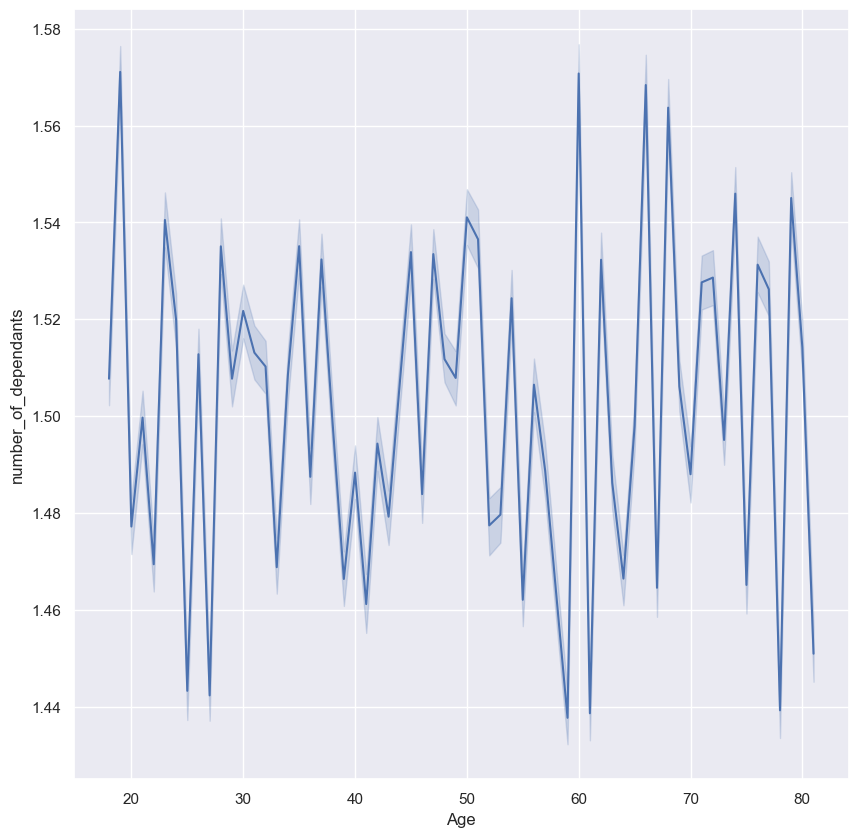

In [45]:
#define figure size
sns.set(rc={"figure.figsize":(6, 6)})

# Draw a line chart
line_chart_age_vs_dependants = sns.lineplot(
    data=df_age_dependants, x='Age', y='number_of_dependants', markers=True, palette='crest', legend='full').set(
    title='Age vs. Number of Dependants')

# Save the plot
plt.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'line_chart_age_vs_dependants.png'))

### *** It is difficult to deduce any info from this plot.

### Answer 7: You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
### o	In a markdown cell beneath your scatterplot, describe what the scatterplot shows.


In [47]:
# Create a subset with only the required columns for line chart
df_age_income = small[['Age','income']]

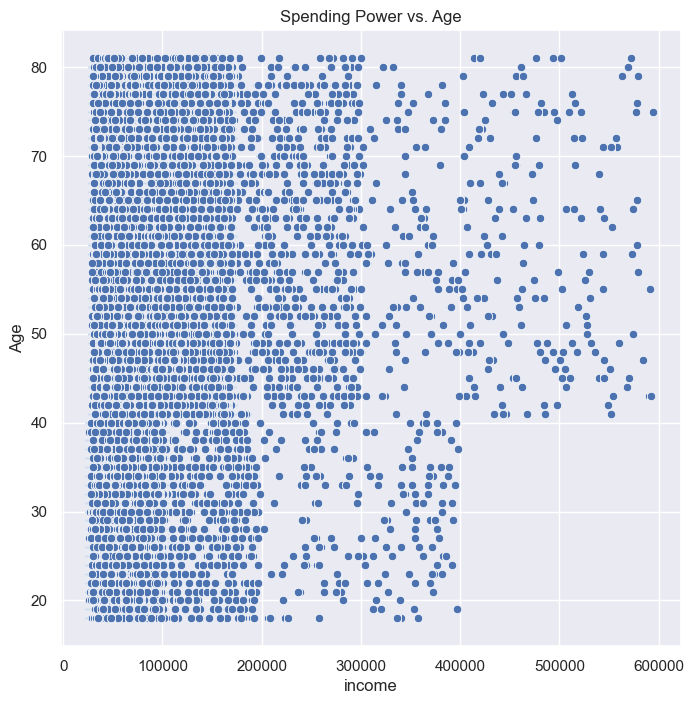

In [64]:
# Make a scatterplot
Scatterplot_Correlation_Scatterplot_Between_Age_Income = sns.scatterplot(x = 'income', y = 'Age', 
                                                                         data = df_age_income, markers=True, 
                                                                         palette='Flare', legend='full').set(
    title='Spending Power vs. Age')

plt.savefig(os.path.join(path,'04 Analysis', 'Visualizations',
                         'Scatterplot_Correlation_Scatterplot_Between_Age_Income.png'))

### *** 1. From the Scatterplot above it can be deduced that more number of 40+ year olds earn more than 400,000 than the younger age group
### *** 2. Most of the income for all age groups is concentrated below 200,000